<table class="table table-bordered">
    <tr>
        <th style="width:250px"><img src='https://www.np.edu.sg/PublishingImages/Pages/default/odp/ICT.jpg' style="width: 100%; height: 125px; "></th>
        <th style="text-align:center;"><h1>Data Wrangling</h1><h2>Exercise 5 - Performing Variable Discretization</h2><h3>Diploma in Data Science</h3></th>
    </tr>
</table>

## Objectives

Discretization, or binning, is the process of transforming continuous variables into discrete variables by creating a set of contiguous intervals, also called bins, that span the range of the variable values. Discretization is used to change the distribution of skewed variables and to minimize the influence of outliers, and hence improve the performance of some machine learning models.

How does discretization minimize the effect of outliers? Discretization places outliers into the lower or higher intervals, together with the remaining inlier values of the distribution. Hence, these outlier observations no longer differ from the rest of the values at the tails of the distribution, as they are now all together in the same interval or bin. Also, if sorting observations across bins with equal frequency, discretization spreads the values of a skewed variable more homogeneously across the value range.

This week we will learn supervised and unsupervised approaches to transform continuous variables into discrete ones. Unsupervised discretization methods do not use any information, other than the variable distribution, to create the contiguous bins. Supervised methods, on the other hand, use target information to create the intervals.

Pls refer to the `Practical 5.1 - Practical 5.4` in the seperate files for details. 

## Exercise

In `airbnb_sg` dataset, choose two numerical variables, which you think are suitable to perform variable discretization / binning. Perform bining on both variables using the bining methods you learned this week.

After bnining, explore if the bins have a linear relationship with the target variable. If not, please order the bins so as to obtain the monotonic relationship between the bins and target. (**Hint:** `Practical 5.3 - Discretization-plus-categorical-encoding`)

In [20]:
# import all the required packages

import pandas as pd
import numpy as np

# sklearn preprocess
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer

# feature engine
import feature_engine.imputation as mdi
from feature_engine.encoding import OneHotEncoder, MeanEncoder, OrdinalEncoder
from feature_engine.discretisation import EqualFrequencyDiscretiser


# Visual
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# load the dataset and show the info of dataset
data = pd.read_csv('./data/airbnb_sg.csv')
data=data.dropna()
data.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,49091,COZICOMFORT LONG TERM STAY ROOM 2,266763,Francesca,North Region,Woodlands,1.44255,103.79580,Private room,83,180,1,2013-10-21,0.01,2,365
1,50646,Pleasant Room along Bukit Timah,227796,Sujatha,Central Region,Bukit Timah,1.33235,103.78521,Private room,81,90,18,2014-12-26,0.28,1,365
2,56334,COZICOMFORT,266763,Francesca,North Region,Woodlands,1.44246,103.79667,Private room,69,6,20,2015-10-01,0.20,2,365
3,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,East Region,Tampines,1.34541,103.95712,Private room,206,1,14,2019-08-11,0.15,9,353
4,71896,B&B Room 1 near Airport & EXPO,367042,Belinda,East Region,Tampines,1.34567,103.95963,Private room,94,1,22,2019-07-28,0.22,9,355


In [22]:
# find numerical variables
num_cols = [c for c in data.columns if data[c].dtypes !='O']
data[num_cols].isnull().mean().sort_values()

id                                0.0
host_id                           0.0
latitude                          0.0
longitude                         0.0
price                             0.0
minimum_nights                    0.0
number_of_reviews                 0.0
reviews_per_month                 0.0
calculated_host_listings_count    0.0
availability_365                  0.0
dtype: float64

In [23]:
data[num_cols].describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,5.148000e+03,5.148000e+03,5148.000000,5148.000000,5148.000000,5148.000000,5148.000000,5148.000000,5148.000000,5148.000000
mean,2.143747e+07,8.032118e+07,1.313295,103.849818,151.311189,12.465229,19.670552,1.043854,35.222222,201.144716
std,9.873083e+06,7.797952e+07,0.029295,0.043747,253.827678,32.413304,34.937245,1.285907,60.130843,142.639212
min,4.909100e+04,2.366600e+04,1.243910,103.646560,0.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,1.396711e+07,1.740449e+07,1.295970,103.837740,62.000000,1.000000,2.000000,0.180000,2.000000,55.000000
50%,2.197951e+07,4.668531e+07,1.310705,103.849805,115.000000,3.000000,6.000000,0.550000,8.000000,239.000000
75%,2.991207e+07,1.341874e+08,1.320337,103.876233,187.000000,6.000000,21.000000,1.370000,32.000000,346.000000
max,3.785242e+07,2.823325e+08,1.452030,103.973420,10000.000000,700.000000,323.000000,13.000000,274.000000,365.000000


In [24]:
data[num_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5148 entries, 0 to 7767
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              5148 non-null   int64  
 1   host_id                         5148 non-null   int64  
 2   latitude                        5148 non-null   float64
 3   longitude                       5148 non-null   float64
 4   price                           5148 non-null   int64  
 5   minimum_nights                  5148 non-null   int64  
 6   number_of_reviews               5148 non-null   int64  
 7   reviews_per_month               5148 non-null   float64
 8   calculated_host_listings_count  5148 non-null   int64  
 9   availability_365                5148 non-null   int64  
dtypes: float64(3), int64(7)
memory usage: 442.4 KB


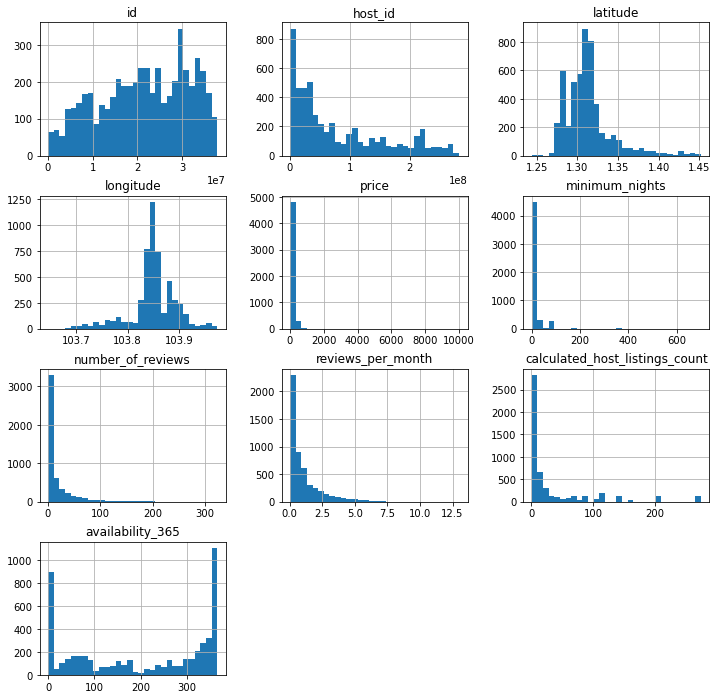

In [25]:
# plot the histogram to the num variables
data[num_cols].hist(bins=30, figsize=(12,12))
plt.show()

In [26]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data[num_cols].drop('price', axis=1), data['price'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((3603, 9), (1545, 9))

In [27]:
# Task 1: Select two variables to perform variable discretization / binning
vars = ['reviews_per_month', 'calculated_host_listings_count']
disc = EqualFrequencyDiscretiser(q=10, variables = vars, return_object= True)
disc.fit(X_train)

train_t = disc.transform(X_train)
test_t = disc.transform(X_test)


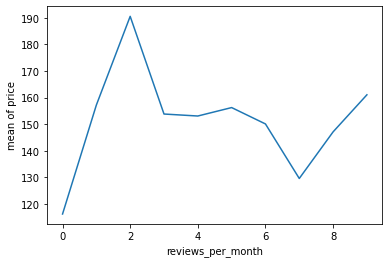

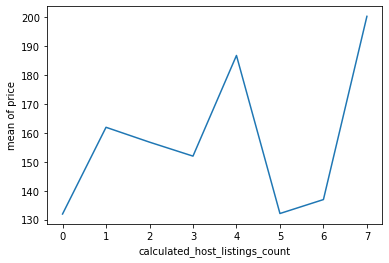

In [28]:
# Task 2: Explore if the bins have a linear relationship with the target
def relationship(var, target):
    pd.concat([train_t, y_train], axis=1).groupby(var)[target].mean().plot()
    plt.ylabel('mean of price')
    plt.show()

relationship('reviews_per_month','price')
relationship('calculated_host_listings_count', 'price')

#There does not seem to be a linear relationship between the bins and the target as the graph fluctuates a lot

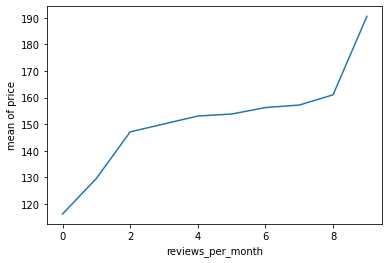

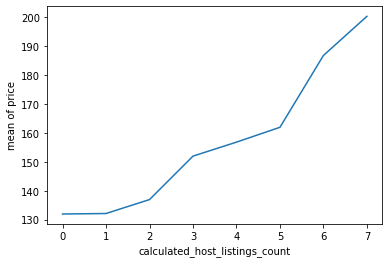

In [29]:
# Task 3: Order the bins to obtain the monotonic relationship between bins and target

enc = OrdinalEncoder(encoding_method = 'ordered')
enc.fit(train_t, y_train)

train_t = enc.transform(train_t)
test_t = enc.transform(test_t)

def mon_rs(var, target):
    pd.concat([train_t, y_train], axis=1).groupby(var)[target].mean().plot()
    plt.ylabel('mean of price')
    plt.show()

mon_rs('reviews_per_month','price')
mon_rs('calculated_host_listings_count', 'price')

#After ordering the bins, we can clearly see a linear relationship between the bins and the target